In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pandasql
from pandasql import sqldf
import pandasql as ps

In [2]:
# Function to use pandasql; it allows us to use SQL on pandas DataFrames
pysqldf = lambda q: sqldf(q, globals())

In [3]:
# Path to the directory containing the CSV files
csv_directory = r'C:\Users\rdobe\OneDrive\Documents\Stack Overflow'

# Dictionary to store DataFrames
dataframes = {}

# List all CSV files in the directory
csv_files = os.listdir(csv_directory)

# Iterate through each CSV file and load into a DataFrame
for csv_file in csv_files:
    # Check if the file is a CSV file
    if csv_file.endswith('.csv'):
        # Construct the full path to the CSV file
        csv_path = os.path.join(csv_directory, csv_file)
        
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        
        # Store DataFrame in the dictionary with filename as key
        dataframes[csv_file] = df

In [4]:
#give each file a df name

filename_to_access = 'survey_results_public_2019.csv'

if filename_to_access in dataframes:
    df_19 = dataframes[filename_to_access]

filename_to_access = 'survey_results_public_2020.csv'

if filename_to_access in dataframes:
    df_20 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2021.csv'

if filename_to_access in dataframes:
    df_21 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2022.csv'

if filename_to_access in dataframes:
    df_22 = dataframes[filename_to_access]
    
filename_to_access = 'survey_results_public_2023.csv'

if filename_to_access in dataframes:
    df_23 = dataframes[filename_to_access]

In [5]:
query = """
SELECT *
FROM df_22
"""

# Use pandasql to execute the SQL query
result_df = pysqldf(query)

# Display the result
result_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,None,None,None,None,None,...,None,None,None,None,None,None,None,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,None,14,...,None,None,None,None,None,None,None,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",None,None,20,...,None,None,None,None,None,None,None,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,None,8,...,None,None,None,None,None,None,None,Too long,Easy,NaN


___
**What makes for a well-paid developer?**

To answer this question we will look at the following:

* 1. Correlations between compensation and education
* 2. Correlations between compensation and developer type
* 3. Correlations between compensation and industry

Geographic location is a critical factor to consider — it significantly influences salary levels. Direct comparisons of compensation data without accounting for location can be misleading due to the cost of living and market salary variations across different regions. We'll need to factor this in for a more accurate analysis. 

UPDATE: Upon further glancing over the datasets, it's apparent that this work has been done and it is mostly compared to USD

___


### 1. Correlations between compensation and education
___

### 2023

In [6]:
query = """
SELECT Employment, EdLevel, ConvertedCompYearly
FROM df_23
WHERE ConvertedCompYearly IS NOT NULL AND EdLevel IS NOT NULL AND Employment IS NOT NULL

"""

#NOTE: including 'IS NOT NULL' in SQL query to filter out any NaN values

# Use pandasql to execute the SQL query
df_filtered_23 = pysqldf(query)

# Display the result
df_filtered_23.head(5)


,Employment,EdLevel,ConvertedCompYearly
0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0
1,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0
2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0
3,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23456.0
4,"Employed, full-time",Some college/university study without earning ...,96828.0


In [7]:
# Checking for NaNs in the Entire DataFrame
is_nan_in_df = df_filtered_23.isna().any().any()
print("Are there any NaN values in the DataFrame?", is_nan_in_df)

Are there any NaN values in the DataFrame? False


In [8]:
# Add the new columns, initializing with False
df_filtered_23['FullTime23'] = False
df_filtered_23['PartTime23'] = False
df_filtered_23['Independent23'] = False

# Update the columns based on conditions
df_filtered_23.loc[df_filtered_23['Employment'] == 'Employed, full-time', 'FullTime23'] = True
df_filtered_23.loc[df_filtered_23['Employment'] == 'Employed, part-time', 'PartTime23'] = True
df_filtered_23.loc[df_filtered_23['Employment'] == 'Independent contractor, freelancer, or self-employed', 'Independent23'] = True

df_filtered_23.head()

,Employment,EdLevel,ConvertedCompYearly,FullTime23,PartTime23,Independent23
0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0,True,False,False
1,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0,True,False,False
2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0,True,False,False
3,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23456.0,False,False,False
4,"Employed, full-time",Some college/university study without earning ...,96828.0,True,False,False


In [9]:
from scipy import stats

# Grouping the numeric data by the categories
groups = df_filtered_23.groupby('EdLevel')['ConvertedCompYearly'].apply(list)

# Running ANOVA
f_value, p_value = stats.f_oneway(*groups)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")


F-value: 10.424648028932802
P-value: 3.7876075887688554e-13


F-value: This is a measure of the variance between the group means divided by the variance within the groups. A higher F-value indicates a greater degree of separation between the group means. In your case, an F-value of about 10.42 suggests that there's a significant difference in the average ConvertedCompYearly among the different EdLevel groups. It's a hint that the level of education might influence yearly compensation.

P-value: The P-value tells you about the statistical significance of your results. Specifically, a P-value of 3.7876075887688554e-13 is way below the common significance level of 0.05. This extremely low P-value indicates that the observed differences in yearly compensation across education levels are very unlikely to have occurred by chance.


In [10]:
query = """
SELECT EdLevel, AVG(ConvertedCompYearly) AS AvgCompFullTime23
FROM df_filtered_23
WHERE FullTime23 = True
GROUP BY EdLevel
ORDER BY AvgCompFullTime23 DESC
"""

mean_compensation_by_edlevel_full_time = ps.sqldf(query)

mean_compensation_by_edlevel_full_time



,EdLevel,AvgCompFullTime23
0,Primary/elementary school,488398.475177
1,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",109025.145187
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",100520.173865
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",97248.559634
4,"Associate degree (A.A., A.S., etc.)",88712.120584
5,Some college/university study without earning ...,87311.888430
6,"Secondary school (e.g. American high school, G...",80470.048947
7,Something else,62527.428947


___
'Primary/elementary school' seems to be in lead, which suggests that there might be outliers we need to clean up.
___

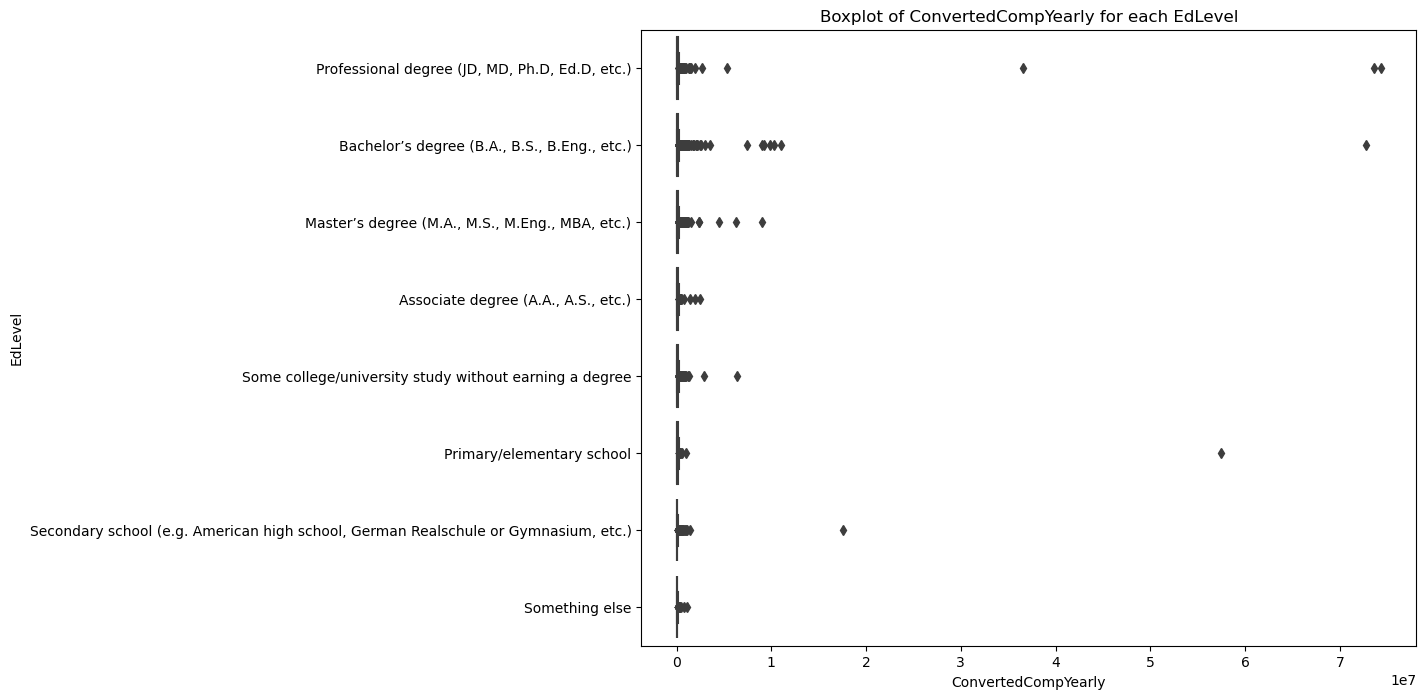

In [11]:
# Create a boxplot for all categories in EdLevel
plt.figure(figsize=(10, 8))  # This sets the size of the figure
sns.boxplot(x='ConvertedCompYearly', y='EdLevel', data=df_filtered_23, order=df_filtered_23.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index)

# Set the title for the plot
plt.title("Boxplot of ConvertedCompYearly for each EdLevel")

# Show the plot
plt.show()

___
It's obvious that there are some values that are too high and we will remove them.
___

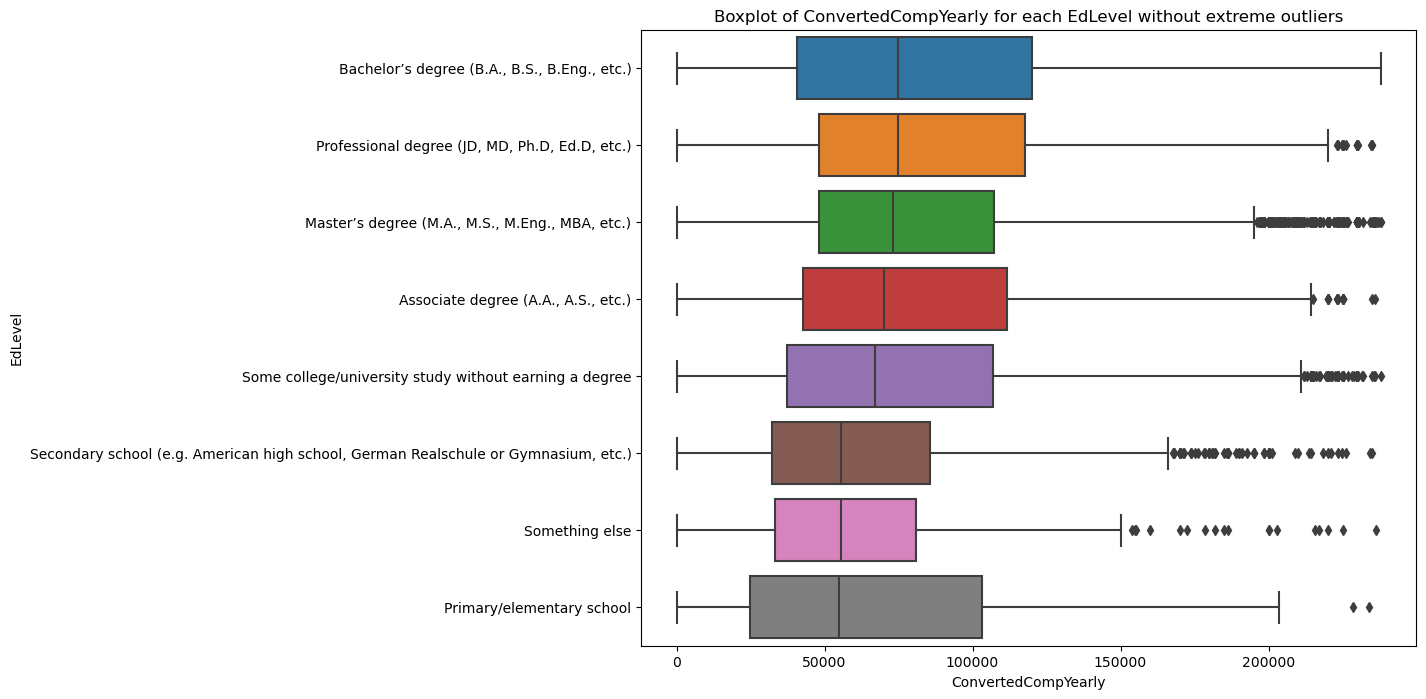

In [12]:
# Define a function to filter out outliers using the IQR method
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the DataFrame
cleaned_df_23 = remove_extreme_outliers(df_filtered_23, 'ConvertedCompYearly')

# Now create the boxplot for all categories in EdLevel, without extreme outliers
plt.figure(figsize=(10, 8))  # This sets the size of the figure
sns.boxplot(
    x='ConvertedCompYearly', 
    y='EdLevel', 
    data=cleaned_df_23, 
    order=cleaned_df_23.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index
)

# Set the title for the plot
plt.title("Boxplot of ConvertedCompYearly for each EdLevel without extreme outliers")

# Show the plot
plt.show()


In [13]:
#combining Average Comp for all employed categories 

query = """
SELECT 
    EdLevel,
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) AS AvgCompFullTime23,
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) AS AvgCompPartTime23,
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) AS AvgCompIndependent23
FROM cleaned_df_23
WHERE FullTime23 = True OR PartTime23 = True OR Independent23 = True
GROUP BY EdLevel
ORDER BY 
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) DESC
"""

mean_compensation_by_edlevel_combined_23 = ps.sqldf(query)

mean_compensation_by_edlevel_combined_23

,EdLevel,AvgCompFullTime23,AvgCompPartTime23,AvgCompIndependent23
0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",86745.286682,78013.764706,86360.344371
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",82285.778866,63792.533088,90975.513298
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",85210.084590,45876.121469,84443.991941
3,"Associate degree (A.A., A.S., etc.)",80845.267928,51477.419355,75636.904348
4,Something else,58960.492021,54982.083333,78839.920000
5,Some college/university study without earning ...,77143.110236,33189.868687,78300.979899
6,Primary/elementary school,66336.437037,30845.800000,72816.636364
7,"Secondary school (e.g. American high school, G...",63474.139975,31220.000000,70291.281633


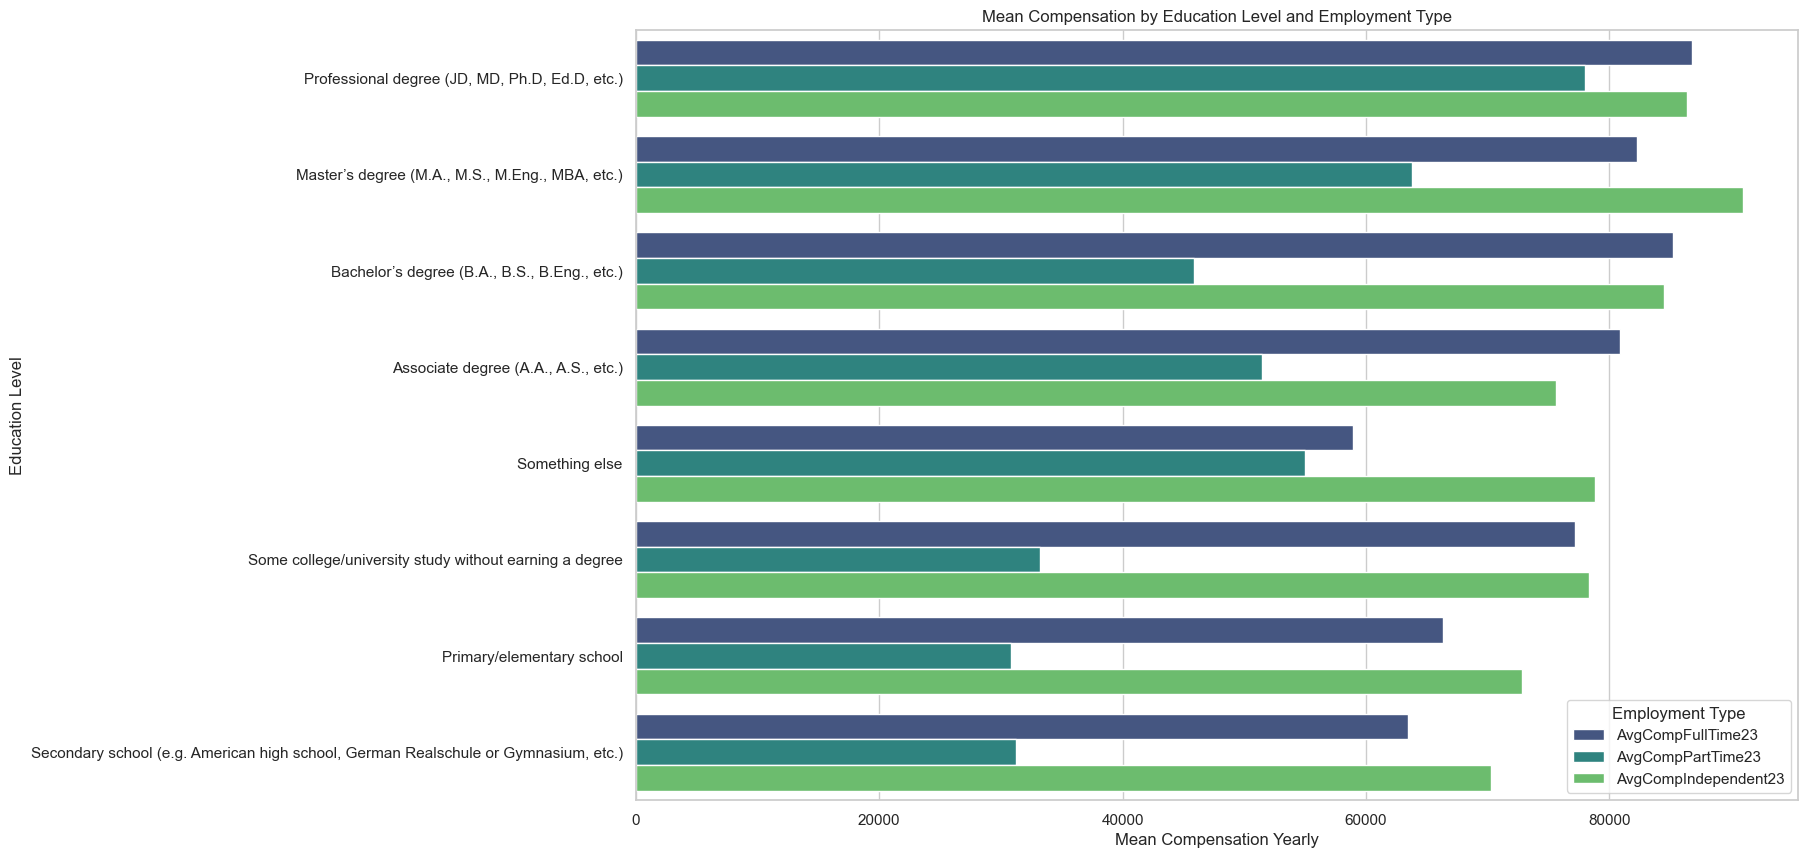

In [14]:
# Plotting the sorted DataFrame with Seaborn, using the 'viridis' palette for the final version

plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")

# Convert the DataFrame to a "long-form" or "tidy" DataFrame
df_long = mean_compensation_by_edlevel_combined_23.reset_index().melt(id_vars="EdLevel", var_name="Employment Type", value_name="Mean Compensation Yearly")

# Filter out the rows where 'Employment Type' is 'index'
df_long_filtered = df_long[df_long['Employment Type'] != 'index']

# Now use df_long_filtered for plotting
sns.barplot(
    x="Mean Compensation Yearly", 
    y="EdLevel", 
    hue="Employment Type", 
    data=df_long_filtered, 
    palette="viridis"
)

plt.title('Mean Compensation by Education Level and Employment Type')
plt.xlabel('Mean Compensation Yearly')
plt.ylabel('Education Level')
#plt.tight_layout()
plt.show()


___
The outcome so far is satisfactory. We will continue with other years.
___

### 2022

In [15]:
query = """
SELECT Employment, EdLevel, ConvertedCompYearly
FROM df_22
WHERE ConvertedCompYearly IS NOT NULL AND EdLevel IS NOT NULL AND Employment IS NOT NULL

"""

# Use pandasql to execute the SQL query
df_filtered_22 = pysqldf(query)

# Display the result
df_filtered_22.head(5)

,Employment,EdLevel,ConvertedCompYearly
0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",40205.0
1,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",215232.0
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",49056.0
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",60307.0
4,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",194400.0


In [16]:
# Checking for NaNs in the Entire DataFrame
is_nan_in_df = df_filtered_22.isna().any().any()
print("Are there any NaN values in the DataFrame?", is_nan_in_df)

Are there any NaN values in the DataFrame? False


In [17]:
# Add the new columns, initializing with False
df_filtered_22['FullTime22'] = False
df_filtered_22['PartTime22'] = False
df_filtered_22['Independent22'] = False

# Update the columns based on conditions
df_filtered_22.loc[df_filtered_22['Employment'] == 'Employed, full-time', 'FullTime22'] = True
df_filtered_22.loc[df_filtered_22['Employment'] == 'Employed, part-time', 'PartTime22'] = True
df_filtered_22.loc[df_filtered_22['Employment'] == 'Independent contractor, freelancer, or self-employed', 'Independent22'] = True

df_filtered_22.head()

,Employment,EdLevel,ConvertedCompYearly,FullTime22,PartTime22,Independent22
0,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",40205.0,True,False,False
1,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",215232.0,True,False,False
2,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",49056.0,True,False,False
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",60307.0,True,False,False
4,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",194400.0,False,False,False


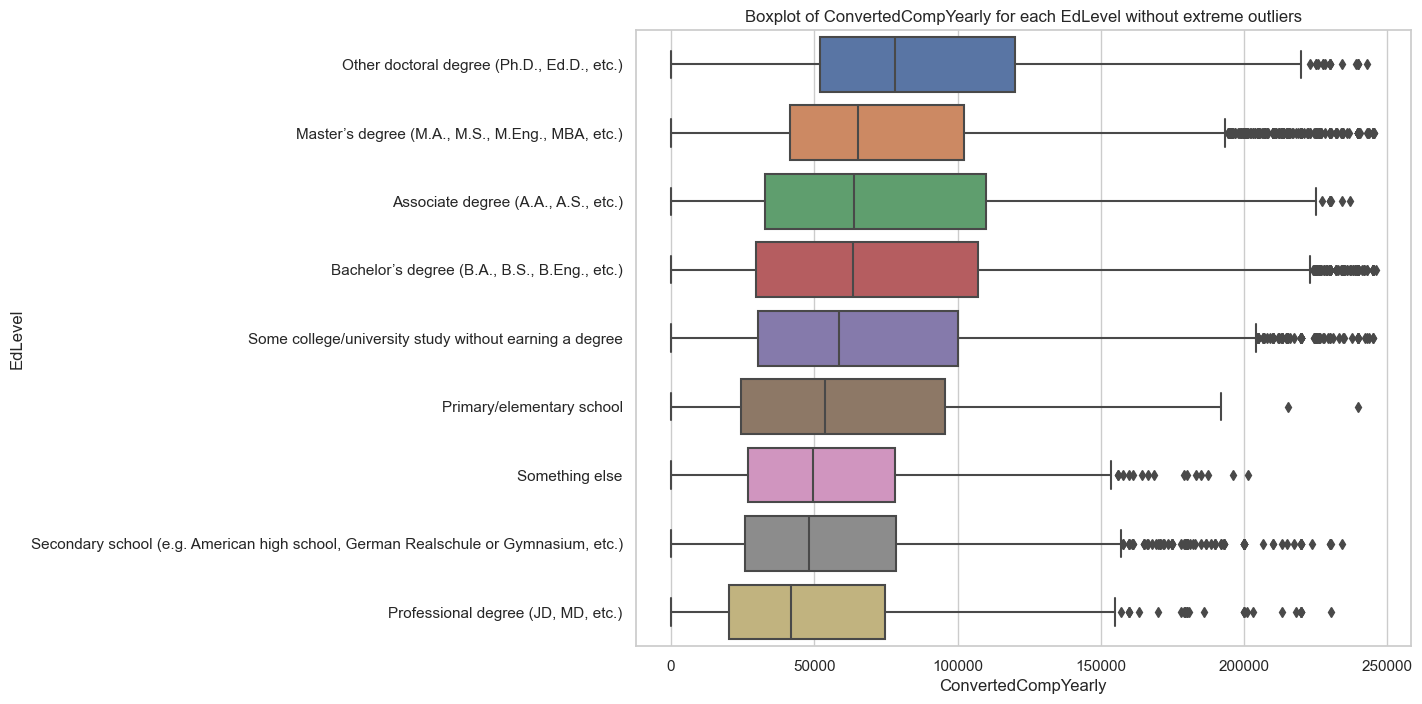

In [18]:
# Define a function to filter out outliers using the IQR method
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the DataFrame
cleaned_df_22 = remove_extreme_outliers(df_filtered_22, 'ConvertedCompYearly')

# Now create the boxplot for all categories in EdLevel, without extreme outliers
plt.figure(figsize=(10, 8))  # This sets the size of the figure
sns.boxplot(
    x='ConvertedCompYearly', 
    y='EdLevel', 
    data=cleaned_df_22, 
    order=cleaned_df_22.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False).index
)

# Set the title for the plot
plt.title("Boxplot of ConvertedCompYearly for each EdLevel without extreme outliers")

# Show the plot
plt.show()


In [19]:
#combining Average Comp for all employed categories 

query = """
SELECT 
    EdLevel,
    AVG(CASE WHEN FullTime22 = True THEN ConvertedCompYearly END) AS AvgCompFullTime22,
    AVG(CASE WHEN PartTime22 = True THEN ConvertedCompYearly END) AS AvgCompPartTime22,
    AVG(CASE WHEN Independent22 = True THEN ConvertedCompYearly END) AS AvgCompIndependent22
FROM cleaned_df_22
WHERE FullTime22 = True OR PartTime22 = True OR Independent22 = True
GROUP BY EdLevel
ORDER BY 
    AVG(CASE WHEN FullTime22 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN PartTime22 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN Independent22 = True THEN ConvertedCompYearly END) DESC
"""

mean_compensation_by_edlevel_combined_22 = ps.sqldf(query)

mean_compensation_by_edlevel_combined_22

,EdLevel,AvgCompFullTime22,AvgCompPartTime22,AvgCompIndependent22
0,"Other doctoral degree (Ph.D., Ed.D., etc.)",91283.132495,63572.387097,85303.525000
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",77168.138406,56242.732484,87130.063772
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",75459.004448,45218.704641,74282.136653
3,"Associate degree (A.A., A.S., etc.)",75093.760000,41500.450000,77099.071429
4,Some college/university study without earning ...,72014.044472,32471.202532,76637.388350
5,Primary/elementary school,64678.775510,30870.000000,72802.833333
6,"Professional degree (JD, MD, etc.)",52992.390728,45930.363636,68681.753846
7,Something else,57210.692884,35471.000000,72466.387097
8,"Secondary school (e.g. American high school, G...",57729.388801,25614.366667,77090.552326


### 2019 - 2021 

requires a different approach since Employment is not a multi-answer question

In [20]:
df_21.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [21]:
df_20.rename(columns={'ConvertedComp': 'ConvertedCompYearly' }, inplace=True)
df_19.rename(columns={'ConvertedComp': 'ConvertedCompYearly' }, inplace=True)

In [22]:
# Define the main function to process the DataFrame
def process_dataset(df, year):
    # Step 1: Filter the DataFrame
    query = f"""
    SELECT Employment, EdLevel, ConvertedCompYearly
    FROM df
    WHERE ConvertedCompYearly IS NOT NULL AND EdLevel IS NOT NULL AND Employment IS NOT NULL
    """
    df_filtered = ps.sqldf(query, locals())

    # Step 2: Add new columns for employment types
    full_time_col = f'FullTime{year}'
    part_time_col = f'PartTime{year}'
    independent_col = f'Independent{year}'
    
    df_filtered[full_time_col] = df_filtered['Employment'] == 'Employed full-time'
    df_filtered[part_time_col] = df_filtered['Employment'] == 'Employed part-time'
    df_filtered[independent_col] = df_filtered['Employment'] == 'Independent contractor, freelancer, or self-employed'

    # Step 3: Remove extreme outliers
    cleaned_df = remove_extreme_outliers(df_filtered, 'ConvertedCompYearly')

    # Step 4: Compute average compensation by education level
    query = f"""
    SELECT 
        EdLevel,
        AVG(CASE WHEN {full_time_col} = True THEN ConvertedCompYearly END) AS AvgCompFullTime{year},
        AVG(CASE WHEN {part_time_col} = True THEN ConvertedCompYearly END) AS AvgCompPartTime{year},
        AVG(CASE WHEN {independent_col} = True THEN ConvertedCompYearly END) AS AvgCompIndependent{year}
    FROM cleaned_df
    WHERE {full_time_col} = True OR {part_time_col} = True OR {independent_col} = True
    GROUP BY EdLevel
    ORDER BY 
        AVG(CASE WHEN {full_time_col} = True THEN ConvertedCompYearly END) + 
        AVG(CASE WHEN {part_time_col} = True THEN ConvertedCompYearly END) + 
        AVG(CASE WHEN {independent_col} = True THEN ConvertedCompYearly END) DESC
    """
    mean_compensation_by_edlevel_combined = ps.sqldf(query, locals())
    
    return mean_compensation_by_edlevel_combined

# Function to remove extreme outliers
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assuming df_21, df_20, df_19 are your DataFrames for those years
mean_compensation_by_edlevel_combined_21 = process_dataset(df_21, 21)
mean_compensation_by_edlevel_combined_20 = process_dataset(df_20, 20)
mean_compensation_by_edlevel_combined_19 = process_dataset(df_19, 19)


In [23]:
#renaming few EdLevels

mean_compensation_by_edlevel_combined_19['EdLevel'] = mean_compensation_by_edlevel_combined_19['EdLevel'].replace('Associate degree', 'Associate degree (A.A., A.S., etc.)')
mean_compensation_by_edlevel_combined_19['EdLevel'] = mean_compensation_by_edlevel_combined_19['EdLevel'].replace('Bachelor’s degree (BA, BS, B.Eng., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')
mean_compensation_by_edlevel_combined_19['EdLevel'] = mean_compensation_by_edlevel_combined_19['EdLevel'].replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)')
mean_compensation_by_edlevel_combined_19['EdLevel'] = mean_compensation_by_edlevel_combined_19['EdLevel'].replace('Other doctoral degree (Ph.D, Ed.D., etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)')

mean_compensation_by_edlevel_combined_21['EdLevel'] = mean_compensation_by_edlevel_combined_21['EdLevel'].replace('Something else','I never completed any formal education')
mean_compensation_by_edlevel_combined_22['EdLevel'] = mean_compensation_by_edlevel_combined_22['EdLevel'].replace('Something else','I never completed any formal education')
mean_compensation_by_edlevel_combined_23['EdLevel'] = mean_compensation_by_edlevel_combined_23['EdLevel'].replace('Something else','I never completed any formal education')

mean_compensation_by_edlevel_combined_23['EdLevel'] = mean_compensation_by_edlevel_combined_23['EdLevel'].replace('Professional degree (JD, MD, Ph.D, Ed.D, etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)')
mean_compensation_by_edlevel_combined_23['EdLevel'] = mean_compensation_by_edlevel_combined_23['EdLevel'].replace('Something else','I never completed any formal education')

In [24]:
# Set EdLevel as the Index 
mean_compensation_by_edlevel_combined_23.set_index('EdLevel', inplace=True)
mean_compensation_by_edlevel_combined_22.set_index('EdLevel', inplace=True)
mean_compensation_by_edlevel_combined_21.set_index('EdLevel', inplace=True)
mean_compensation_by_edlevel_combined_20.set_index('EdLevel', inplace=True)
mean_compensation_by_edlevel_combined_19.set_index('EdLevel', inplace=True)

In [25]:
#combine all AVG compensations per work-load category and EdLevel
combined_df = pd.concat([mean_compensation_by_edlevel_combined_23, mean_compensation_by_edlevel_combined_22, mean_compensation_by_edlevel_combined_21, mean_compensation_by_edlevel_combined_20, mean_compensation_by_edlevel_combined_19], axis=1)
combined_df

,AvgCompFullTime23,AvgCompPartTime23,AvgCompIndependent23,AvgCompFullTime22,AvgCompPartTime22,AvgCompIndependent22,AvgCompFullTime21,AvgCompPartTime21,AvgCompIndependent21,AvgCompFullTime20,AvgCompPartTime20,AvgCompIndependent20,AvgCompFullTime19,AvgCompPartTime19,AvgCompIndependent19
EdLevel,,,,,,,,,,,,,,,
"Other doctoral degree (Ph.D., Ed.D., etc.)",86745.286682,78013.764706,86360.344371,91283.132495,63572.387097,85303.525000,83477.794461,59830.408163,75121.371681,76182.482721,54215.000000,65112.054795,81460.876534,56827.236842,81032.347458
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",82285.778866,63792.533088,90975.513298,77168.138406,56242.732484,87130.063772,65911.121122,44901.964539,76121.454393,62623.917029,38993.523148,68938.571816,62704.104002,37385.533762,71200.212649
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",85210.084590,45876.121469,84443.991941,75459.004448,45218.704641,74282.136653,62446.213092,27611.936396,61118.392078,59215.318031,26572.877805,61656.525497,62134.747514,25436.815789,64839.075595
"Associate degree (A.A., A.S., etc.)",80845.267928,51477.419355,75636.904348,75093.760000,41500.450000,77099.071429,64909.080372,29727.938776,66527.770000,61203.468238,28420.244898,65129.583333,59180.696321,30909.594203,65990.229630
I never completed any formal education,58960.492021,54982.083333,78839.920000,57210.692884,35471.000000,72466.387097,49408.269634,47807.312500,74956.346939,56101.469027,45352.000000,73105.384615,61847.986577,37362.000000,56128.411765
Some college/university study without earning a degree,77143.110236,33189.868687,78300.979899,72014.044472,32471.202532,76637.388350,61690.758028,22342.231707,62040.281013,57569.408801,22006.076923,60554.173913,60640.165523,21096.656510,63479.553468
Primary/elementary school,66336.437037,30845.800000,72816.636364,64678.775510,30870.000000,72802.833333,60037.041916,18959.727273,59123.945455,53628.209091,23396.500000,58805.782609,54950.843931,22369.090909,38142.705882
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",63474.139975,31220.000000,70291.281633,57729.388801,25614.366667,77090.552326,51687.851078,22108.843537,57486.458967,47977.532727,19305.089109,52993.351064,48134.091785,18294.164948,55716.165517
"Professional degree (JD, MD, etc.)",NaN,NaN,NaN,52992.390728,45930.363636,68681.753846,44498.556589,27887.764706,60423.600000,39306.406015,16543.727273,51557.358974,40624.103506,24914.434783,42931.305556


In [27]:
query = """
SELECT 
    EdLevel,
    AvgCompFullTime19 AS "2019",
    AvgCompFullTime20 AS "2020",
    AvgCompFullTime21 AS "2021",
    AvgCompFullTime22 AS "2022",
    AvgCompFullTime23 AS "2023"
FROM combined_df

"""

full_time_df = ps.sqldf(query, locals())

full_time_df

,EdLevel,2019,2020,2021,2022,2023
0,"Other doctoral degree (Ph.D., Ed.D., etc.)",81460.876534,76182.482721,83477.794461,91283.132495,86745.286682
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",62704.104002,62623.917029,65911.121122,77168.138406,82285.778866
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",62134.747514,59215.318031,62446.213092,75459.004448,85210.084590
3,"Associate degree (A.A., A.S., etc.)",59180.696321,61203.468238,64909.080372,75093.760000,80845.267928
4,I never completed any formal education,61847.986577,56101.469027,49408.269634,57210.692884,58960.492021
5,Some college/university study without earning ...,60640.165523,57569.408801,61690.758028,72014.044472,77143.110236
6,Primary/elementary school,54950.843931,53628.209091,60037.041916,64678.775510,66336.437037
7,"Secondary school (e.g. American high school, G...",48134.091785,47977.532727,51687.851078,57729.388801,63474.139975
8,"Professional degree (JD, MD, etc.)",40624.103506,39306.406015,44498.556589,52992.390728,NaN


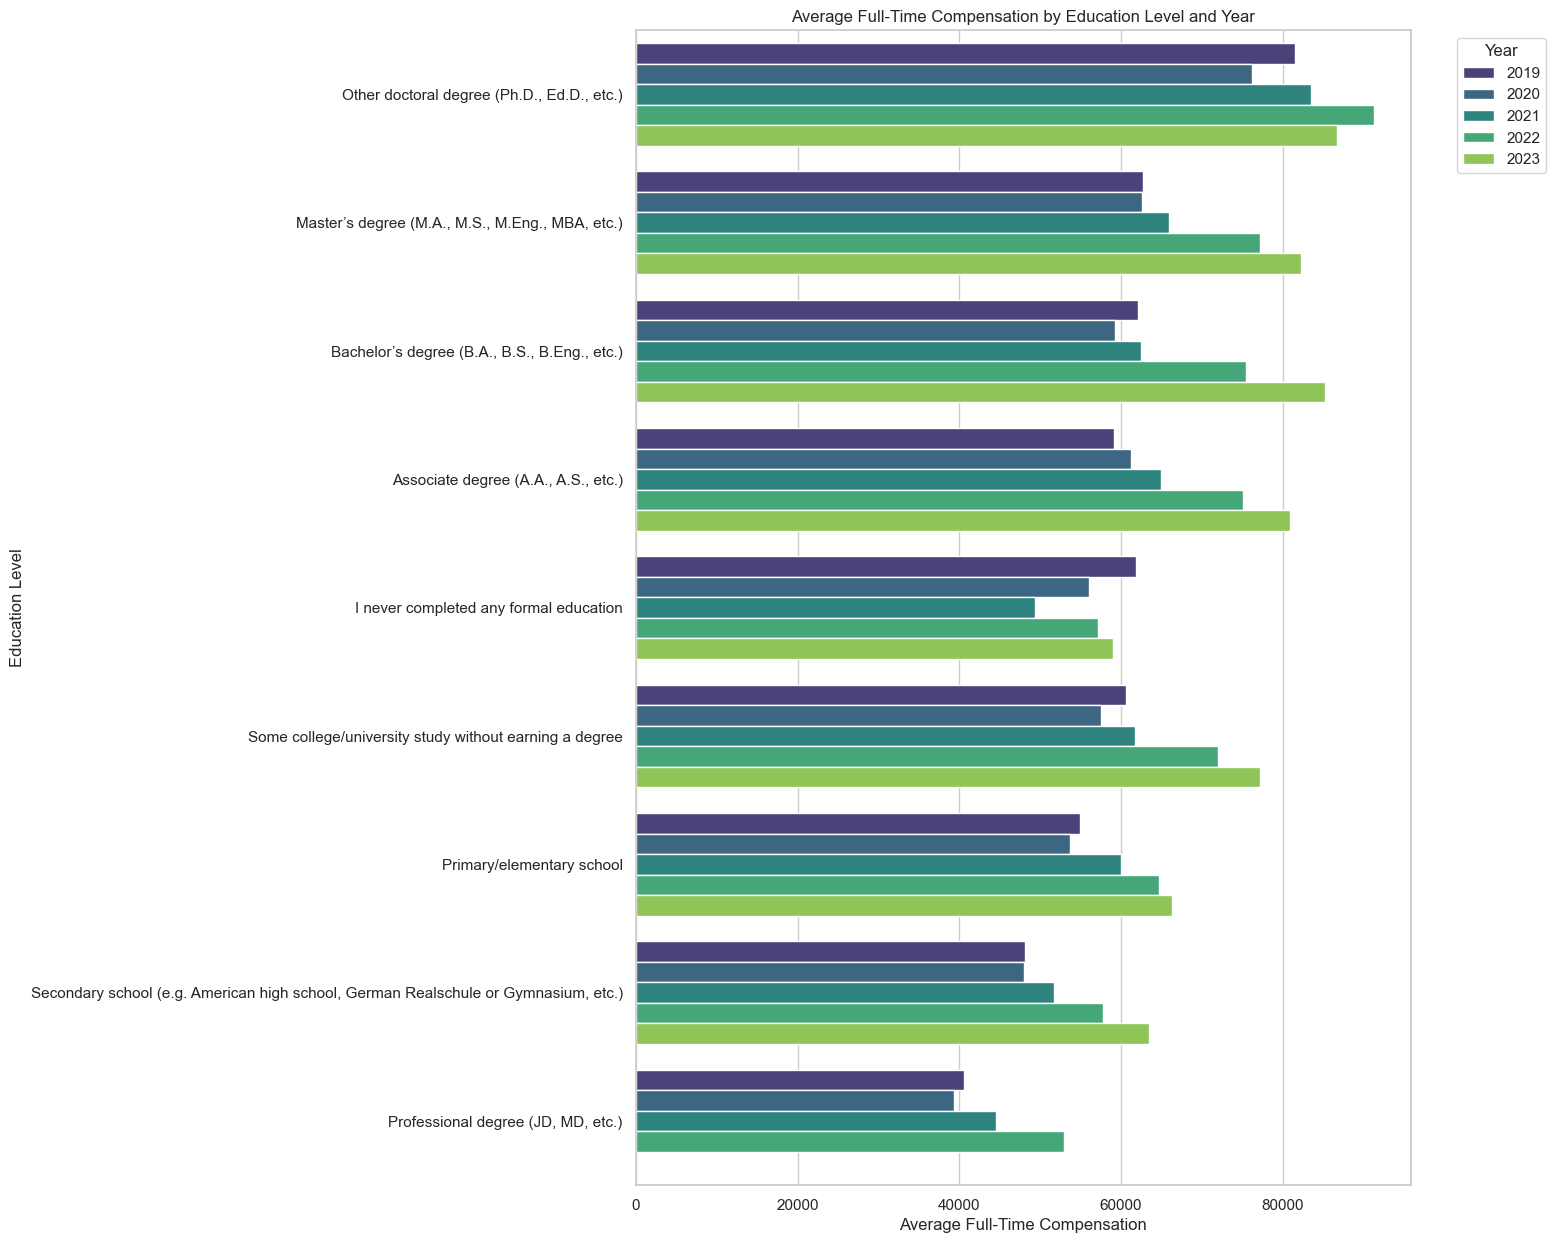

In [28]:
# Ensure that 'full_time_df' is in a 'long' format for seaborn
df_long = full_time_df.melt(id_vars='EdLevel', var_name='Year', value_name='AvgCompFullTime')

# Plot
plt.figure(figsize=(10, 15))
sns.barplot(y='EdLevel', x='AvgCompFullTime', hue='Year', data=df_long, palette='viridis')

plt.title('Average Full-Time Compensation by Education Level and Year')
plt.ylabel('Education Level')
plt.xlabel('Average Full-Time Compensation')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#plt.tight_layout()
plt.show()


___
**Key insights:**

* Higher education equates to higher average full-time compensation
  
* Doctoral degrees show a stable trend to hold the highest salary. However 2023 is the year of change, since master, bachelors and associate degrees are almost at the same earning levels as doctoral.

* There’s a general increase in compensation from 2019 to 2023 across all education levels.
  
* People with primary/elementary education and those who never completed any formal education show the least increase in compensation over the years.
  
* The gap between the highest (professional degrees) and lowest (no formal education) compensation levels seems quite significant.
___

In [29]:
query = """
SELECT 
    EdLevel,
    AvgCompPartTime19 AS "2019",
    AvgCompPartTime20 AS "2020",
    AvgCompPartTime21 AS "2021",
    AvgCompPartTime22 AS "2022",
    AvgCompPartTime23 AS "2023"
FROM combined_df

"""

part_time_df = ps.sqldf(query, locals())

part_time_df

,EdLevel,2019,2020,2021,2022,2023
0,"Other doctoral degree (Ph.D., Ed.D., etc.)",56827.236842,54215.000000,59830.408163,63572.387097,78013.764706
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37385.533762,38993.523148,44901.964539,56242.732484,63792.533088
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25436.815789,26572.877805,27611.936396,45218.704641,45876.121469
3,"Associate degree (A.A., A.S., etc.)",30909.594203,28420.244898,29727.938776,41500.450000,51477.419355
4,I never completed any formal education,37362.000000,45352.000000,47807.312500,35471.000000,54982.083333
5,Some college/university study without earning ...,21096.656510,22006.076923,22342.231707,32471.202532,33189.868687
6,Primary/elementary school,22369.090909,23396.500000,18959.727273,30870.000000,30845.800000
7,"Secondary school (e.g. American high school, G...",18294.164948,19305.089109,22108.843537,25614.366667,31220.000000
8,"Professional degree (JD, MD, etc.)",24914.434783,16543.727273,27887.764706,45930.363636,NaN


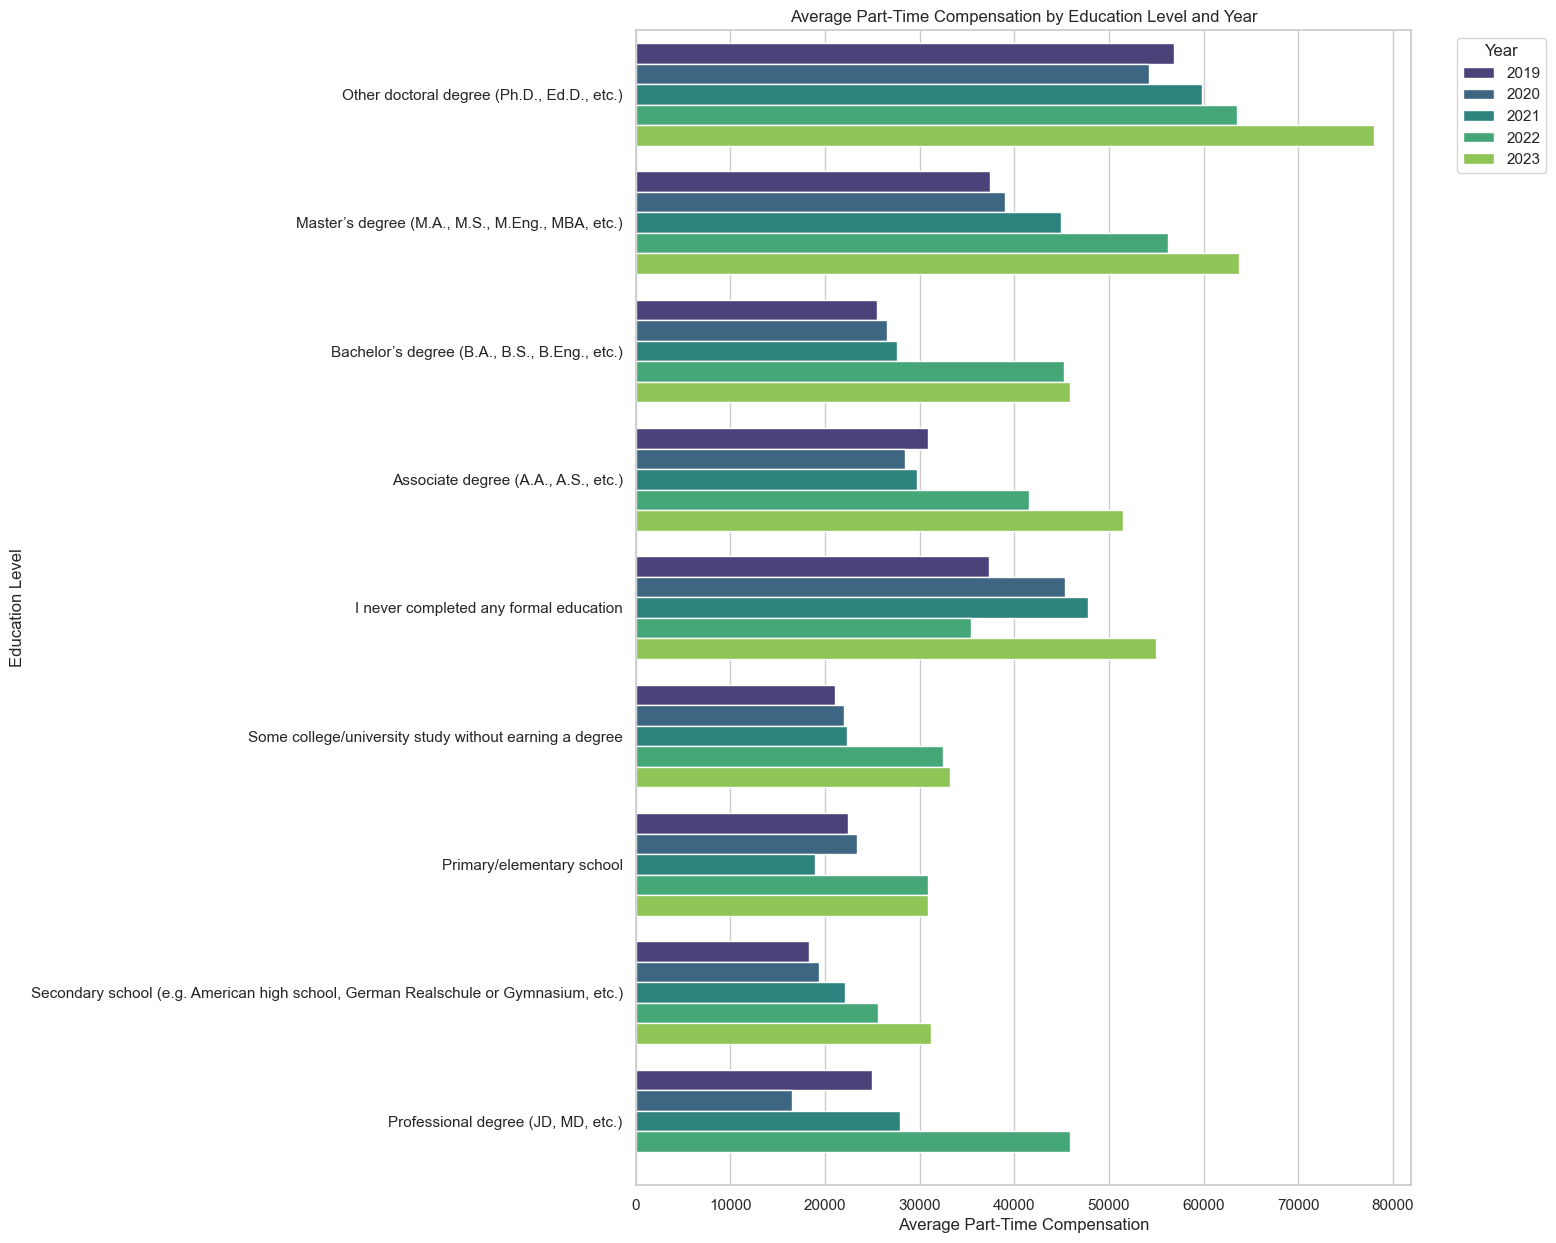

In [30]:
df_long = part_time_df.melt(id_vars='EdLevel', var_name='Year', value_name='AvgCompPartTime')

# Plot
plt.figure(figsize=(10, 15))
sns.barplot(y='EdLevel', x='AvgCompPartTime', hue='Year', data=df_long, palette='viridis')

plt.title('Average Part-Time Compensation by Education Level and Year')
plt.ylabel('Education Level')
plt.xlabel('Average Part-Time Compensation')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#plt.tight_layout()
plt.show()


___
**Key insights:**

* Individuals with a master's degree or other doctoral degrees generally have the highest part-time compensation across all years. This suggests that higher education levels correlate with higher earnings, even in part-time roles.

* There is an upward trend in part-time compensation over the years for all education levels, indicating a general increase in compensation rates.

* Doctoral Degrees: The compensation for individuals with doctoral degrees shows substantial growth, especially from 2022 to 2023.

* Compared to full-time compensation, part-time has a more accentuated gap between highest earning, mid-level and low. However this trend is changing in the last 2 years.

* Individuals who never completed any formal education or only completed primary/elementary school seem to have least earnings.

* The consistent growth across all education levels may reflect broader economic trends such as inflation or increased demand for skilled part-time workers.
___

In [31]:
query = """
SELECT 
    EdLevel,
    AvgCompIndependent19 AS "2019",
    AvgCompIndependent20 AS "2020",
    AvgCompIndependent21 AS "2021",
    AvgCompIndependent22 AS "2022",
    AvgCompIndependent23 AS "2023"
FROM combined_df

"""

independent_df = ps.sqldf(query, locals())

independent_df

,EdLevel,2019,2020,2021,2022,2023
0,"Other doctoral degree (Ph.D., Ed.D., etc.)",81032.347458,65112.054795,75121.371681,85303.525000,86360.344371
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",71200.212649,68938.571816,76121.454393,87130.063772,90975.513298
2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",64839.075595,61656.525497,61118.392078,74282.136653,84443.991941
3,"Associate degree (A.A., A.S., etc.)",65990.229630,65129.583333,66527.770000,77099.071429,75636.904348
4,I never completed any formal education,56128.411765,73105.384615,74956.346939,72466.387097,78839.920000
5,Some college/university study without earning ...,63479.553468,60554.173913,62040.281013,76637.388350,78300.979899
6,Primary/elementary school,38142.705882,58805.782609,59123.945455,72802.833333,72816.636364
7,"Secondary school (e.g. American high school, G...",55716.165517,52993.351064,57486.458967,77090.552326,70291.281633
8,"Professional degree (JD, MD, etc.)",42931.305556,51557.358974,60423.600000,68681.753846,NaN


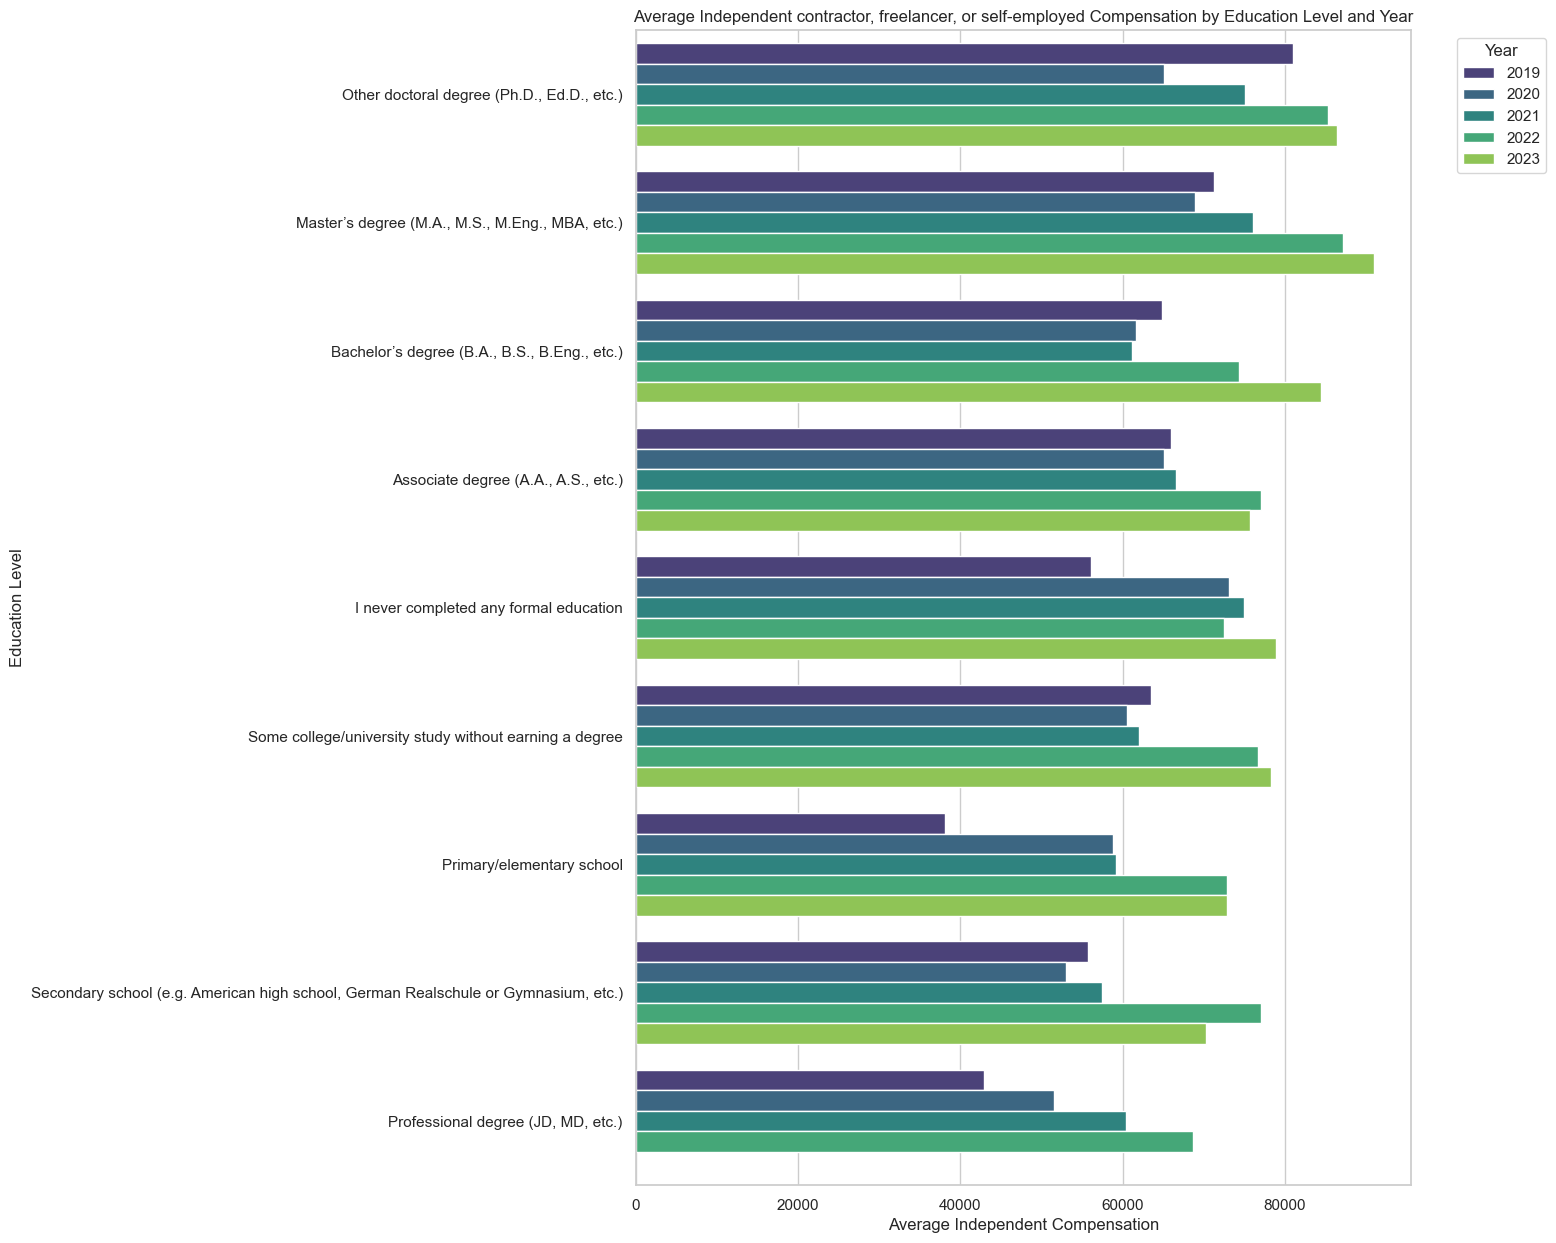

In [32]:
df_long = independent_df.melt(id_vars='EdLevel', var_name='Year', value_name='AvgCompIndependent')

# Plot
plt.figure(figsize=(10, 15))
sns.barplot(y='EdLevel', x='AvgCompIndependent', hue='Year', data=df_long, palette='viridis')

plt.title('Average Independent contractor, freelancer, or self-employed Compensation by Education Level and Year')
plt.ylabel('Education Level')
plt.xlabel('Average Independent Compensation')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#plt.tight_layout()
plt.show()


___
**Key insights:**

* Higher education typically correlates with higher compensation for independent contractors, freelancers, or self-employed individuals.

* There’s a clear increase in average compensation across almost all education levels from 2020 to 2023.

* For Independent workers the highest earners have a Masters degree. Bsachelors degree is also catching up in 2023.

* The compensation for individuals with no formal education are lower than to those with degrees. However the gap is not that large. 

* There's a consistent upward trend year over year for each education level, indicating a positive trajectory in earnings for independent workers.
___


### 2. Correlations between compensation and developer type 
___

In [33]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_23.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [34]:
# Dealing with some consistency in values accross datasets
df_23 = df_23.replace('Employed, full-time', 'Employed full-time', regex=True)
df_22 = df_22.replace('Employed, full-time', 'Employed full-time', regex=True)
df_23 = df_23.replace('Employed, part-time', 'Employed part-time', regex=True)
df_22 = df_22.replace('Employed, part-time', 'Employed part-time', regex=True)


In [35]:
df_23['DevType'].value_counts()

DevType
Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics                        866
Data or business analyst                           837
Sy

In [36]:
query = """
SELECT Employment, DevType, ConvertedCompYearly
FROM df_23
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL AND Employment IS NOT NULL

"""

# Use pandasql to execute the SQL query
df_devtype_23 = pysqldf(query)

# Display the result
df_devtype_23.head(5)

,Employment,DevType,ConvertedCompYearly
0,Employed full-time,"Senior Executive (C-Suite, VP, etc.)",285000.0
1,Employed full-time,"Developer, back-end",250000.0
2,Employed full-time,"Developer, front-end",156000.0
3,"Employed full-time;Independent contractor, fre...","Developer, full-stack",23456.0
4,Employed full-time,"Developer, back-end",96828.0


In [37]:
# Add the new columns, initializing with False
df_devtype_23['FullTime23'] = False
df_devtype_23['PartTime23'] = False
df_devtype_23['Independent23'] = False

# Update the columns based on conditions
df_devtype_23.loc[df_devtype_23['Employment'] == 'Employed full-time', 'FullTime23'] = True
df_devtype_23.loc[df_devtype_23['Employment'] == 'Employed part-time', 'PartTime23'] = True
df_devtype_23.loc[df_devtype_23['Employment'] == 'Independent contractor, freelancer, or self-employed', 'Independent23'] = True

df_devtype_23['Employment'].value_counts()

Employment
Employed full-time                                                                            39271
Independent contractor, freelancer, or self-employed                                           3902
Employed full-time;Independent contractor, freelancer, or self-employed                        3290
Employed part-time                                                                              905
Independent contractor, freelancer, or self-employed;Employed part-time                         240
Employed full-time;Employed part-time                                                           154
Employed full-time;Independent contractor, freelancer, or self-employed;Employed part-time      109
Independent contractor, freelancer, or self-employed;Retired                                     16
Employed full-time;Retired                                                                        7
Employed part-time;Retired                                                               

In [38]:
# Define a function to filter out outliers using the IQR method
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the DataFrame
cleaned_devtype_23 = remove_extreme_outliers(df_devtype_23, 'ConvertedCompYearly')

In [39]:
query = """
SELECT 
    DevType,
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) AS AvgCompFullTime23,
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) AS AvgCompPartTime23,
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) AS AvgCompIndependent23
FROM cleaned_devtype_23
WHERE FullTime23 = True OR PartTime23 = True OR Independent23 = True
GROUP BY DevType
ORDER BY 
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) DESC
"""

mean_compensation_by_devtype_combined_23 = ps.sqldf(query)

mean_compensation_by_devtype_combined_23

,DevType,AvgCompFullTime23,AvgCompPartTime23,AvgCompIndependent23
0,"Senior Executive (C-Suite, VP, etc.)",115602.334755,121943.000000,96104.688312
1,Engineering manager,117674.995084,79904.857143,112300.805556
2,Cloud infrastructure engineer,107116.565724,74967.285714,107699.766667
3,Security professional,97328.428571,88238.571429,90827.750000
4,Marketing or sales professional,112959.500000,70344.000000,88296.000000
5,Product manager,93290.656250,77104.000000,95308.300000
6,Developer Advocate,107564.477273,77104.000000,79150.666667
7,Scientist,98023.159236,59416.111111,105679.666667
8,"Engineer, site reliability",112436.100402,43371.000000,101805.625000
9,DevOps specialist,87339.828897,70325.375000,98620.176471


___
**Key insights:**

* Senior roles and specialized fields pay more.

* C-suite executives, engineering managers, and cloud infrastructure engineers are at the top for all employment types.

* The independent contractor field can be quite lucrative in certain roles, with some nearing or exceeding full-time compensation, like scientist, DevOps specialist, the cloud infrastructure engineer, Database administrator, Data Engineer, or blockchain specialist.

* Traditional roles like system administrators and educators have lower average compensations compared to emerging tech roles.

* Roles central to tech and software development, like DevOps specialists and full-stack developers, have strong compensation across all work types.

* These insights show the value of specialization and the potential for independent work in certain tech fields to be competitive with full-time roles.
___ 

Since DevTypes becomes a multi-answer question in other surveys, we will narrow focus on the most common developer types, namely: 
* Developer, full-stack
* Developer, back-end
* Developer, front-end


In [40]:
# Use .loc[] to avoid SettingWithCopyWarning when replacing values
df_22.loc[:, 'Employment'] = df_22['Employment'].replace({
    'Employed, full-time': 'Employed full-time',
    'Employed, part-time': 'Employed part-time'
})

df_23.loc[:, 'Employment'] = df_23['Employment'].replace({
    'Employed, full-time': 'Employed full-time',
    'Employed, part-time': 'Employed part-time'
})

In [41]:
df_20.rename(columns={'ConvertedComp': 'ConvertedCompYearly' }, inplace=True)
df_19.rename(columns={'ConvertedComp': 'ConvertedCompYearly' }, inplace=True)

In [42]:
# Define the main function to process the DataFrame
def process_dataset(df, year):
    
    # Step 1: apply_simplify_devtype
    processed_dfs = apply_simplify_devtype(dataframes)

    # Step 2: Filter the DataFrame
    query = f"""
    SELECT Employment, SimplifiedDevType, ConvertedCompYearly
    FROM df
    WHERE ConvertedCompYearly IS NOT NULL AND SimplifiedDevType IS NOT NULL AND Employment IS NOT NULL
    """
    df_filtered = ps.sqldf(query, locals())

    # Step 3: Add new columns for employment types
    full_time_col = f'FullTime{year}'
    part_time_col = f'PartTime{year}'
    independent_col = f'Independent{year}'
    
    df_filtered[full_time_col] = df_filtered['Employment'] == 'Employed full-time'
    df_filtered[part_time_col] = df_filtered['Employment'] == 'Employed part-time'
    df_filtered[independent_col] = df_filtered['Employment'] == 'Independent contractor, freelancer, or self-employed'

    # Step 4: Remove extreme outliers
    cleaned_df = remove_extreme_outliers(df_filtered, 'ConvertedCompYearly')

    # Step 5: Compute average compensation by education level
    query = f"""
    SELECT 
        SimplifiedDevType,
        AVG(CASE WHEN {full_time_col} = True THEN ConvertedCompYearly END) AS AvgCompFullTime{year},
        AVG(CASE WHEN {part_time_col} = True THEN ConvertedCompYearly END) AS AvgCompPartTime{year},
        AVG(CASE WHEN {independent_col} = True THEN ConvertedCompYearly END) AS AvgCompIndependent{year}
    FROM cleaned_df
    WHERE {full_time_col} = True OR {part_time_col} = True OR {independent_col} = True
    GROUP BY SimplifiedDevType
    ORDER BY 
        AVG(CASE WHEN {full_time_col} = True THEN ConvertedCompYearly END) + 
        AVG(CASE WHEN {part_time_col} = True THEN ConvertedCompYearly END) + 
        AVG(CASE WHEN {independent_col} = True THEN ConvertedCompYearly END) DESC
    """
    mean_compensation_by_devtype_combined = ps.sqldf(query, locals())
    
    return mean_compensation_by_devtype_combined

# Function to remove extreme outliers
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Define a function to simplify DevType according to the specified rules
def simplify_devtype(row):
    dev_types = str(row['DevType']).split(';')
    has_fullstack = "Developer, full-stack" in dev_types
    has_backend = "Developer, back-end" in dev_types
    has_frontend = "Developer, front-end" in dev_types

    # Applying the rules
    if has_fullstack or (has_backend and has_frontend):
        return "Developer, full-stack"
    elif has_backend:
        return "Developer, back-end"
    elif has_frontend:
        return "Developer, front-end"
    return None

# Function to simplify to 3 dev types
def apply_simplify_devtype(df_list):
    for df in df_list:
        # Assuming each item in df_list is a DataFrame
        df['SimplifiedDevType'] = df.apply(simplify_devtype, axis=1)
    return df_list

# Assuming df_19, df_20, df_21, df_22, are your DataFrames
dataframes = [df_19, df_20, df_21, df_22, df_23]

# Assuming df_21, df_20, df_19 are your DataFrames for those years
mean_compensation_by_devtype_combined_23 = process_dataset(df_23, 23)
mean_compensation_by_devtype_combined_22 = process_dataset(df_22, 22)
mean_compensation_by_devtype_combined_21 = process_dataset(df_21, 21)
mean_compensation_by_devtype_combined_20 = process_dataset(df_20, 20)
mean_compensation_by_devtype_combined_19 = process_dataset(df_19, 19)

In [43]:
mean_compensation_by_devtype_combined_21

,SimplifiedDevType,AvgCompFullTime21,AvgCompPartTime21,AvgCompIndependent21
0,"Developer, back-end",66253.861427,32292.424893,74920.755776
1,"Developer, full-stack",62032.191891,31947.103208,63462.341730
2,"Developer, front-end",51131.107128,20673.919643,52379.393701


In [44]:
# Set EdLevel as the Index 
mean_compensation_by_devtype_combined_23.set_index('SimplifiedDevType', inplace=True)
mean_compensation_by_devtype_combined_22.set_index('SimplifiedDevType', inplace=True)
mean_compensation_by_devtype_combined_21.set_index('SimplifiedDevType', inplace=True)
mean_compensation_by_devtype_combined_20.set_index('SimplifiedDevType', inplace=True)
mean_compensation_by_devtype_combined_19.set_index('SimplifiedDevType', inplace=True)

In [45]:
#Combine all the years
combined_df = pd.concat([mean_compensation_by_devtype_combined_23, mean_compensation_by_devtype_combined_22, mean_compensation_by_devtype_combined_21, mean_compensation_by_devtype_combined_20, mean_compensation_by_devtype_combined_19], axis=1)
combined_df

,AvgCompFullTime23,AvgCompPartTime23,AvgCompIndependent23,AvgCompFullTime22,AvgCompPartTime22,AvgCompIndependent22,AvgCompFullTime21,AvgCompPartTime21,AvgCompIndependent21,AvgCompFullTime20,AvgCompPartTime20,AvgCompIndependent20,AvgCompFullTime19,AvgCompPartTime19,AvgCompIndependent19
SimplifiedDevType,,,,,,,,,,,,,,,
"Developer, back-end",81664.898026,59452.440994,92542.197655,78001.128225,47130.041322,87475.904110,66253.861427,32292.424893,74920.755776,61453.401311,28436.586826,69063.407407,63425.888249,27149.044776,69335.088235
"Developer, full-stack",78407.599235,49363.495268,80276.879571,73512.716071,43681.842657,76109.551833,62032.191891,31947.103208,63462.341730,59564.156980,28161.881864,62697.036199,61030.314964,26314.481713,65003.512891
"Developer, front-end",67605.944614,39387.703704,72637.751055,59588.214944,27242.960784,77943.328467,51131.107128,20673.919643,52379.393701,47550.375873,27139.406250,46654.374046,53479.784738,23290.230088,55152.574163


In [46]:
query = """
SELECT 
    SimplifiedDevType,
    AvgCompFullTime19 AS "2019",
    AvgCompFullTime20 AS "2020",
    AvgCompFullTime21 AS "2021",
    AvgCompFullTime22 AS "2022",
    AvgCompFullTime23 AS "2023"
FROM combined_df

"""

full_time_df = ps.sqldf(query, locals())

full_time_df

,SimplifiedDevType,2019,2020,2021,2022,2023
0,"Developer, back-end",63425.888249,61453.401311,66253.861427,78001.128225,81664.898026
1,"Developer, full-stack",61030.314964,59564.156980,62032.191891,73512.716071,78407.599235
2,"Developer, front-end",53479.784738,47550.375873,51131.107128,59588.214944,67605.944614


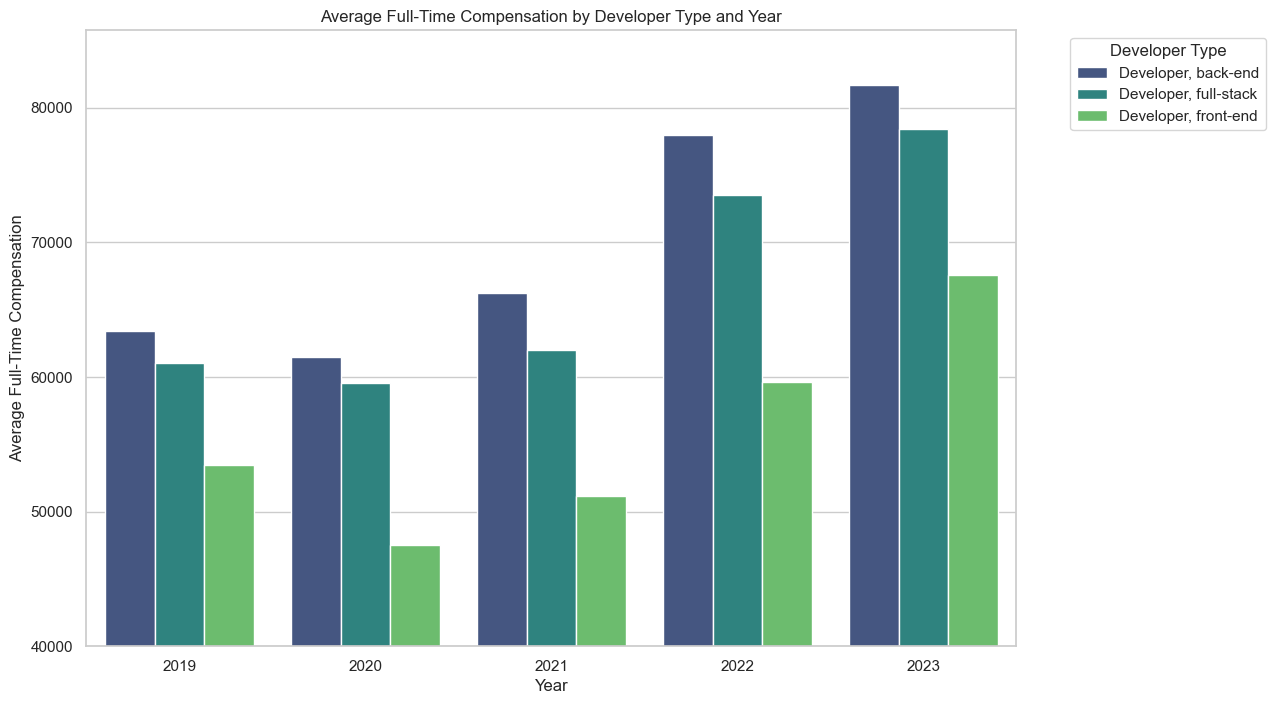

In [47]:
# Ensure that 'full_time_df' is in a 'long' format for seaborn
df_long = full_time_df.melt(id_vars='SimplifiedDevType', var_name='Year', value_name='AvgCompFullTime')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y='AvgCompFullTime', x='Year', hue='SimplifiedDevType', data=df_long, palette='viridis')

plt.title('Average Full-Time Compensation by Developer Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Full-Time Compensation')
plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#Set the y-axis to start from 40.000, to study the visible changes
plt.ylim(40000,)

#plt.tight_layout()
plt.show()

___
**Key insights:**

* Overall Growth: There is a clear upward trend in the average full-time compensation for all types of developers from 2020 to 2023.

* Developer, back-end: They have the highest compensation throughout the five years, with a particularly noticeable increase between 2021 and 2022.

* Developer, full-stack: The compensation for full-stack developers, while lower than for back-end developers, also shows a steady increase and less fluctuation.  Notably, the gap between full-stack and back-end compensation appears to be closing in 2023.

* Developer, front-end: Front-end developers consistently earn the least, though their compensation is also increasing year over year.

**Implications:**

* Market Dynamics shows more demand for technical skills related to back-end development which may be driving higher salaries.

* Investment in Skills: Given the trends, professionals in the tech industry may see back-end development skills as a more lucrative career path.

* Compensation Convergence: The convergence of compensation for full-stack and back-end developers in 2023 might suggest a growing recognition of the versatility that full-stack developers bring to an organization.
___ 

In [48]:
query = """
SELECT 
    SimplifiedDevType,
    AvgCompPartTime19 AS "2019",
    AvgCompPartTime20 AS "2020",
    AvgCompPartTime21 AS "2021",
    AvgCompPartTime22 AS "2022",
    AvgCompPartTime23 AS "2023"
FROM combined_df
"""

part_time_df = ps.sqldf(query, locals())

part_time_df

,SimplifiedDevType,2019,2020,2021,2022,2023
0,"Developer, back-end",27149.044776,28436.586826,32292.424893,47130.041322,59452.440994
1,"Developer, full-stack",26314.481713,28161.881864,31947.103208,43681.842657,49363.495268
2,"Developer, front-end",23290.230088,27139.406250,20673.919643,27242.960784,39387.703704


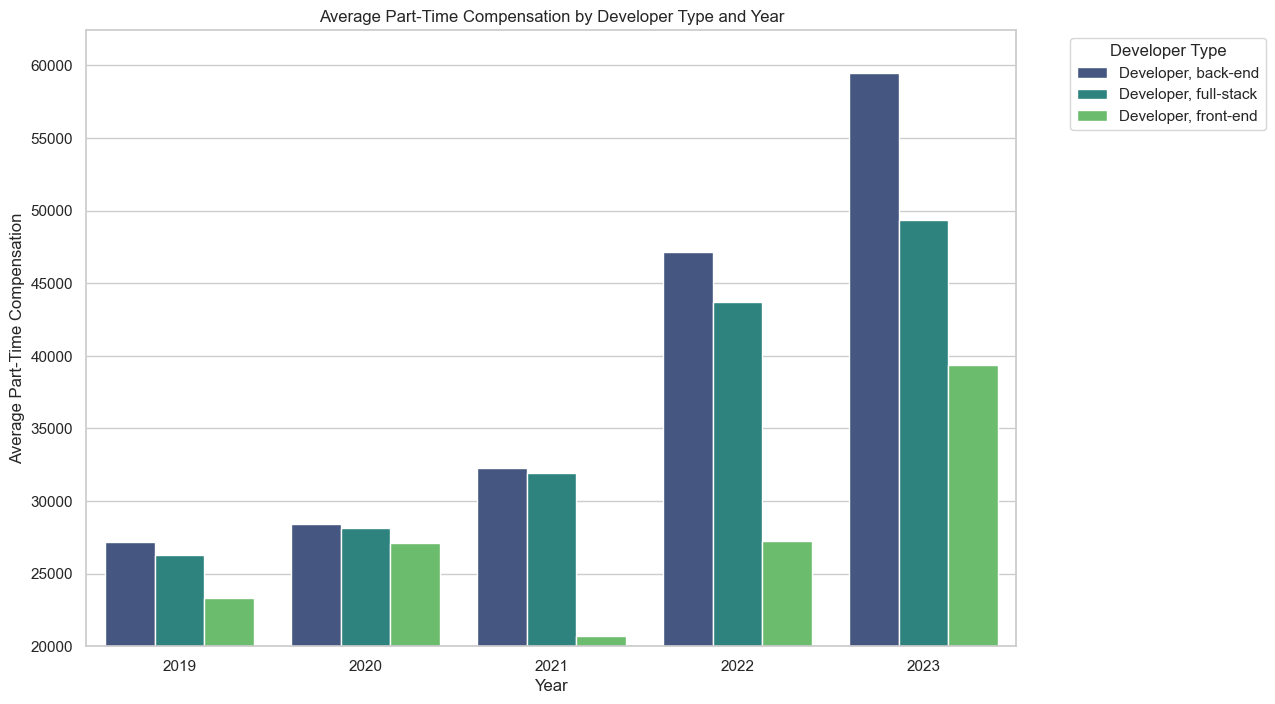

In [49]:
# Ensure that 'full_time_df' is in a 'long' format for seaborn
df_long = part_time_df.melt(id_vars='SimplifiedDevType', var_name='Year', value_name='AvgCompFullTime')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y='AvgCompFullTime', x='Year', hue='SimplifiedDevType', data=df_long, palette='viridis')

plt.title('Average Part-Time Compensation by Developer Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Part-Time Compensation')
plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#Set the y-axis to start from 20.000
plt.ylim(20000,)

#plt.tight_layout()
plt.show()

___
**Key insights:**

* Growth Over Time: Similar to the full-time compensation trend, part-time compensation for all developer types seems to be growing from 2019 to 2023, but with a much higher rate.

* Developer, back-end: They show a very steep increase in part-time compensation from 2021 onwards, suggesting a significant rise in market value or demand for these skills in part-time roles.

* Developer, full-stack: While the compensation for full-stack developers also grows, the increase from year to year is not as sharp as for back-end developers.

* Developer, front-end: The compensation for front-end developers is the lowest among the three types and the most volatile. However, there's a steady growth in compensation, with a notable increase since 2022.

**Implications:**

* Comparative Insight: The growth in part-time compensation for back-end and full-stack developers suggests a robust demand for these roles even in part-time positions.

* Market Dynamics: The data may indicate a market trend where part-time back-end skills are increasingly valued, perhaps due to a need for specialized skills on a project basis.

* Part-Time vs. Full-Time: Comparing to full-time compensations, the overall trend is that Back-end and Full-stack roles see steady increase in compensation. Front end shows very little stability.
___

In [50]:
query = """
SELECT 
    SimplifiedDevType,
    AvgCompIndependent19 AS "2019",
    AvgCompIndependent20 AS "2020",
    AvgCompIndependent21 AS "2021",
    AvgCompIndependent22 AS "2022",
    AvgCompIndependent23 AS "2023"
FROM combined_df

"""

independent_df = ps.sqldf(query, locals())

independent_df

,SimplifiedDevType,2019,2020,2021,2022,2023
0,"Developer, back-end",69335.088235,69063.407407,74920.755776,87475.904110,92542.197655
1,"Developer, full-stack",65003.512891,62697.036199,63462.341730,76109.551833,80276.879571
2,"Developer, front-end",55152.574163,46654.374046,52379.393701,77943.328467,72637.751055


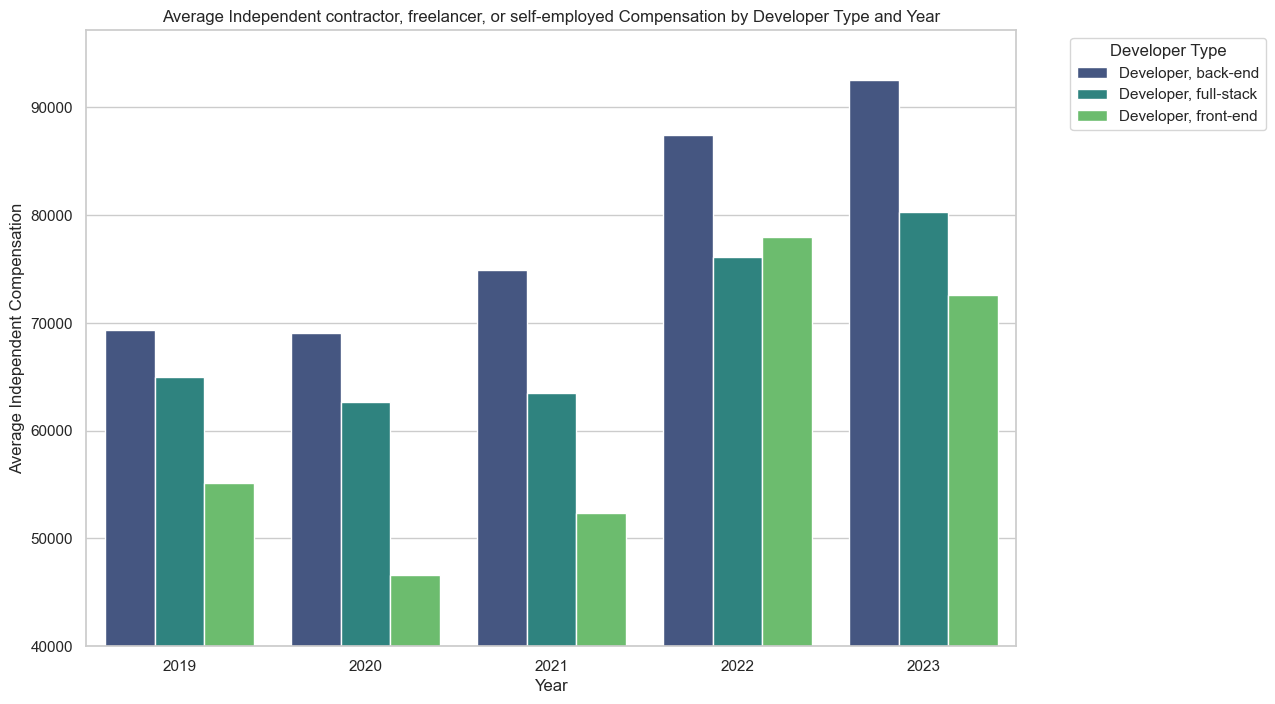

In [51]:
# Ensure that 'full_time_df' is in a 'long' format for seaborn
df_long = independent_df.melt(id_vars='SimplifiedDevType', var_name='Year', value_name='AvgCompFullTime')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y='AvgCompFullTime', x='Year', hue='SimplifiedDevType', data=df_long, palette='viridis')

plt.title('Average Independent contractor, freelancer, or self-employed Compensation by Developer Type and Year')
plt.xlabel('Year')
plt.ylabel('Average Independent Compensation')
plt.legend(title='Developer Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the plot

#Set the y-axis to start from 40.000
plt.ylim(40000,)

#plt.tight_layout()
plt.show()

___
**Key insights:**

* Upswing in Earnings: Like the full-time and part-time roles, there's a general upward trend in compensation across all three types of developers from 2020 to 2023.

* High Earnings for Back-End Developers: Back-end developers stand out with the highest compensation, which peaks in 2023.

* Full-Stack Developer Growth: Compensation for full-stack developers shows a stable increase each year.

* Front-End Developer Compensation: While front-end developers earn the least compared to the other two types, their compensation also grows yearly, with the largest increase in 2022.

**Implications:**

* Variability: The compensation for independent contractors can be more variable year over year, potentially reflecting the nature of project-based work and fluctuating demand for these skills.

* Comparing Work Modalities: The data may also reflect broader industry trends in the freelance market, which might differ from full-time and part-time employment due to factors like project availability, contract lengths, and demand for specialized skills.

* Compared to full-time compensation, independent workers compensation is competitive if not over-reaching full-time positions.
___


### 3. Correlations between compensation and industry
___

Since there are no Industry columns in any other survey apart from 2023 one, we will just investigate which industry ranks between the highest paying

In [52]:
df_23['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: count, dtype: int64

In [53]:
#excluding 'Other' from results
df_23 = df_23[df_23['Industry'] != 'Other']

In [54]:
query = """
SELECT Industry, Employment, ConvertedCompYearly
FROM df_23
WHERE ConvertedCompYearly IS NOT NULL AND Industry IS NOT NULL AND Employment IS NOT NULL

"""

# Use pandasql to execute the SQL query
df_industry_23 = pysqldf(query)

# Display the result
df_industry_23.head(5)

,Industry,Employment,ConvertedCompYearly
0,"Information Services, IT, Software Development...",Employed full-time,285000.0
1,"Information Services, IT, Software Development...",Employed full-time,250000.0
2,"Information Services, IT, Software Development...",Employed full-time,135000.0
3,Financial Services,Employed full-time,80000.0
4,"Information Services, IT, Software Development...",Employed full-time,150000.0


In [55]:
# Add the new columns, initializing with False
df_industry_23['FullTime23'] = False
df_industry_23['PartTime23'] = False
df_industry_23['Independent23'] = False

# Update the columns based on conditions
df_industry_23.loc[df_industry_23['Employment'] == 'Employed full-time', 'FullTime23'] = True
df_industry_23.loc[df_industry_23['Employment'] == 'Employed part-time', 'PartTime23'] = True
df_industry_23.loc[df_industry_23['Employment'] == 'Independent contractor, freelancer, or self-employed', 'Independent23'] = True

df_industry_23.head()

,Industry,Employment,ConvertedCompYearly,FullTime23,PartTime23,Independent23
0,"Information Services, IT, Software Development...",Employed full-time,285000.0,True,False,False
1,"Information Services, IT, Software Development...",Employed full-time,250000.0,True,False,False
2,"Information Services, IT, Software Development...",Employed full-time,135000.0,True,False,False
3,Financial Services,Employed full-time,80000.0,True,False,False
4,"Information Services, IT, Software Development...",Employed full-time,150000.0,True,False,False


In [56]:
# Define a function to filter out outliers using the IQR method
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the DataFrame
cleaned_industry_23 = remove_extreme_outliers(df_industry_23, 'ConvertedCompYearly')

In [57]:
query = """
SELECT 
    Industry,
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) AS Full_Time,
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) AS Part_Time,
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) AS Independent
FROM cleaned_industry_23
WHERE FullTime23 = True OR PartTime23 = True OR Independent23 = True
GROUP BY Industry
ORDER BY 
    AVG(CASE WHEN FullTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN PartTime23 = True THEN ConvertedCompYearly END) + 
    AVG(CASE WHEN Independent23 = True THEN ConvertedCompYearly END) DESC
"""

mean_compensation_by_industry_combined_23 = ps.sqldf(query)

mean_compensation_by_industry_combined_23

,Industry,Full_Time,Part_Time,Independent
0,Legal Services,76983.237762,88182.250000,107074.857143
1,Insurance,87590.197980,80893.250000,94079.782609
2,Healthcare,94172.114812,65889.047619,95502.188406
3,Oil & Gas,78856.206897,56155.333333,116006.222222
4,"Manufacturing, Transportation, or Supply Chain",80223.801744,61134.714286,100788.756410
5,Retail and Consumer Services,88143.863994,56324.263158,92509.677966
6,Financial Services,88414.500360,44300.558140,94769.025000
7,Advertising Services,87085.993548,45893.000000,74309.586207
8,"Information Services, IT, Software Development...",76444.993538,49118.654902,77016.135965
9,Higher Education,70061.166216,39819.125000,79812.214286


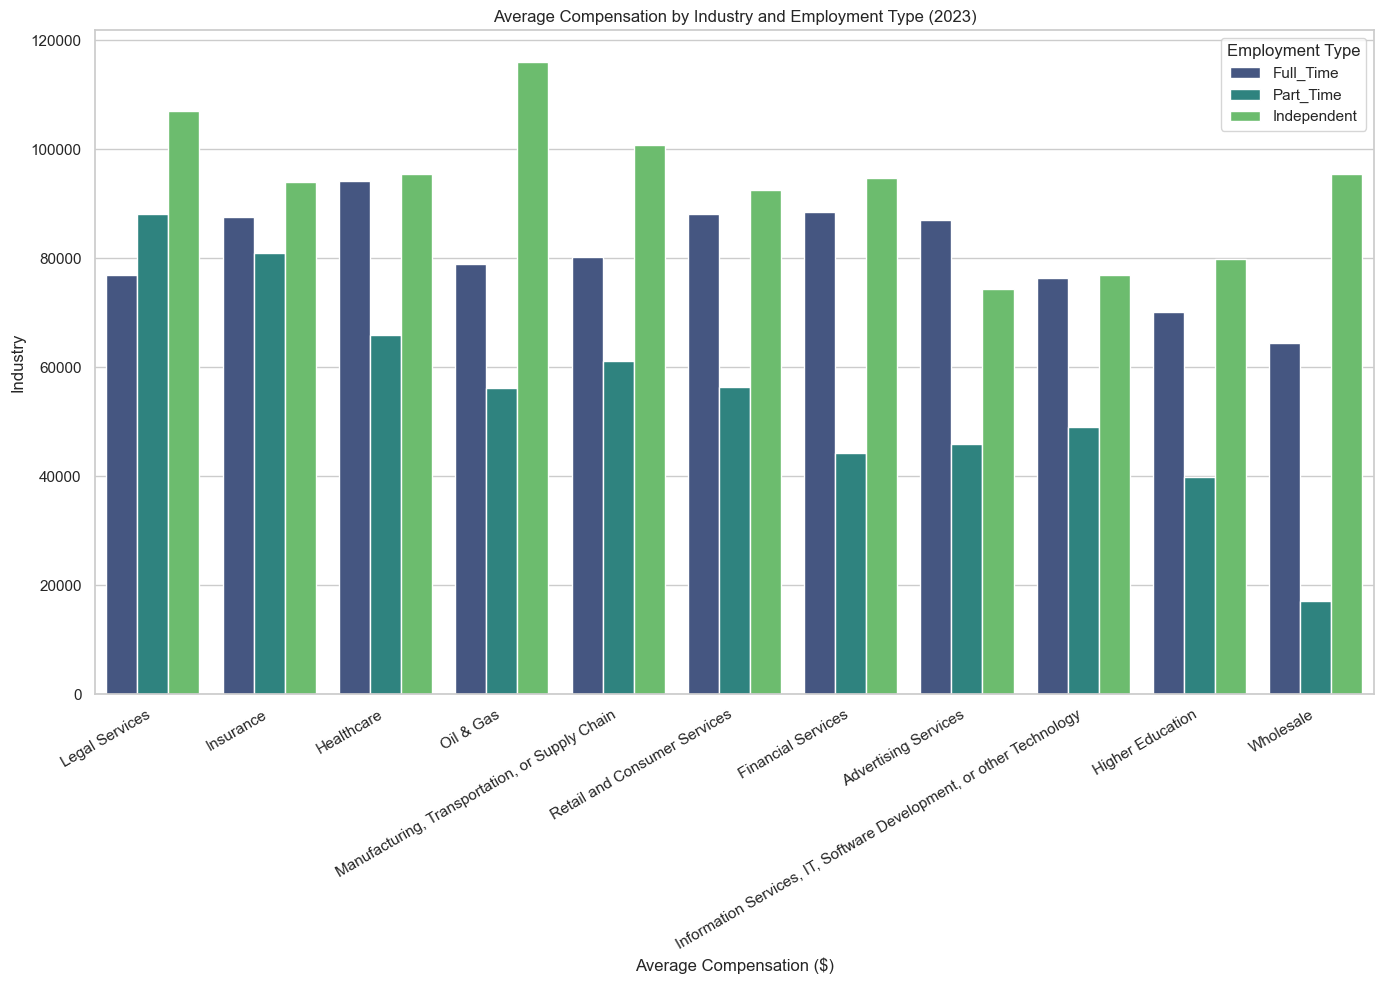

In [58]:
# Melt the sorted DataFrame to long-form
df_melted = mean_compensation_by_industry_combined_23.melt(id_vars='Industry', var_name='EmploymentType', value_name='AvgCompensation')

# Start plotting
plt.figure(figsize=(14, 10))
sns.barplot(
    data=df_melted,
    x='Industry', 
    y='AvgCompensation', 
    hue='EmploymentType',
    palette='viridis'
)

plt.title('Average Compensation by Industry and Employment Type (2023)')
plt.xlabel('Average Compensation ($)')
plt.ylabel('Industry')
plt.legend(title='Employment Type', loc='upper right', bbox_to_anchor=(1, 1))
plt.xticks(rotation=30, horizontalalignment='right')


plt.tight_layout()
plt.show()


___
**Key insights:**

* Legal Services, Insurance and Healthcare has the highest average full-time compensation , part-time compensation and independent compensation.

* All industries, expcept Advertising Services show higher freelance compensations than full-time.

* Wholesale industry, higher education and Information Services, IT, Software Development has the lowest average compensations.

* The Oil & Gas industry presents a unique case where the independent compensation far exceeds both full-time and part-time compensations.
___